# Открытие файла с данными и изучение общей информации

Подключим библиотеки, необходимые для работы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

Открытие и изучение файлов с данными

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
print(calls.info())
calls.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000


In [3]:
internet = pd.read_csv('/datasets/internet.csv')
print(internet.info())
internet.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000


In [4]:
messages = pd.read_csv('/datasets/messages.csv')
print(messages.info())
messages.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000


In [5]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
print(tariffs.info())
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
users = pd.read_csv('/datasets/users.csv')
print(users.info())
users.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra


 **Вывод:**  
- В четырех таблицах неверный формат столбцов с датами.
- В таблице Internet непонятный столбец, нужно избавиться от него.
- Нужно округлить длительность звонков до минут, также мегабайты в бо́льшую сторону. 

# Предобработка данных.

Сначала приведем все столбцы с датами к нужному формату.

In [7]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [8]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [9]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [10]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

В столбце `churn_date` много отсутствующих значений. Проверка уникальных значений столбца:

In [11]:
print(users['churn_date'].unique())

[nan '2018-10-05' '2018-12-18' '2018-11-21' '2018-10-03' '2018-10-14'
 '2018-12-09' '2018-12-11' '2018-12-26' '2018-08-31' '2018-12-03'
 '2018-12-23' '2018-11-07' '2018-12-16' '2018-12-20' '2018-11-30'
 '2018-12-21' '2018-08-17' '2018-09-02' '2018-10-04' '2018-11-13'
 '2018-11-22' '2018-10-28' '2018-11-26' '2018-11-27' '2018-11-16'
 '2018-10-27' '2018-12-30' '2018-09-27' '2018-12-25' '2018-12-14'
 '2018-12-24' '2018-09-26' '2018-10-25']


Все значения 2018 годом. Значит в таблице данные за 2018 год, его часть или ранее. Но важно тут то, что на 1 января 2019 года все пользователи были у оператора, а значит отсутсвующие значения в данном столбце можно заменить на 01.01.2019, а после этого привести к нужному формату столбца

In [12]:
users['churn_date'].fillna('2019-01-01', inplace=True)
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

Удаление лишнего столбца:

In [13]:
internet.drop('Unnamed: 0', axis='columns', inplace=True)

Округление звонков:

In [14]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [15]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Возраст пользователей от 18 до 75 лет. Всё нормально.

In [16]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,7.158198,1253.940619
std,5.959173,144.722751
min,0.000000,1000.000000
25%,2.000000,1126.000000
50%,6.000000,1260.000000
75%,11.000000,1379.000000
max,38.000000,1499.000000


Звонки от 0 до 38 минут, вполне логично, учитывая условия, что 0 - это звонки без ответа, а 38 минут - часто у операторов встречается ограничение по длительности звонка как раз от 30 до 40 минут.

In [17]:
internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


Интернет сессии до 1.7 Гб, ничего необычного. Фильм смотрел, наверное.

Добавление столбца с месяцем в каждую таблицу

In [18]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

Далее создаются сводные таблицы по каждой из услуг.

In [19]:
user_calls = calls.groupby(['user_id', 'month']).agg({'duration':'sum'}).reset_index()\
                  .rename(columns={'duration':'minutes_in_month'})
print('Таблица звонков:')
user_calls.head()

Таблица звонков:


,user_id,month,minutes_in_month
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466


In [20]:
user_messages = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()\
                        .rename(columns={'id':'messages_in_month'})
print('Таблица сообщений:')
user_messages.head()

Таблица сообщений:


,user_id,month,messages_in_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [21]:
user_internet = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}) .reset_index()\
                        .rename(columns={'mb_used':'mb_in_month'})
print('Таблица трафика:')
user_internet.head()

Таблица трафика:


,user_id,month,mb_in_month
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


Объединение этих таблицы в одну.

In [22]:
data = user_calls.merge(user_messages, on=['user_id','month'], how='outer')
data = data.merge(user_internet, on=['user_id','month'], how='outer')
data.head()

,user_id,month,minutes_in_month,messages_in_month,mb_in_month
0,1000,5,159.0,22.0,2253.49
1,1000,6,172.0,60.0,23233.77
2,1000,7,340.0,75.0,14003.64
3,1000,8,408.0,81.0,14055.93
4,1000,9,466.0,57.0,14568.91


Присоединение к объединенной таблице данных пользователей и тарифа:

In [23]:
data = data.merge(users, on='user_id', how='left')
tariffs = tariffs.rename(columns={'tariff_name':'tariff'}) # Переименовываю столбец для объединения таблиц
data = data.merge(tariffs, on='tariff', how='left')
data.head()

,user_id,month,minutes_in_month,messages_in_month,mb_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,2253.49,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,60.0,23233.77,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,75.0,14003.64,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,81.0,14055.93,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,57.0,14568.91,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Проверка на отсутствующие значения сводной таблицы:

In [24]:
data.isna().sum()

user_id                    0
month                      0
minutes_in_month          40
messages_in_month        497
mb_in_month               11
age                        0
churn_date                 0
city                       0
first_name                 0
last_name                  0
reg_date                   0
tariff                     0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

Месяцев, когда люди не пользовались sms больше всего. Логично. Заполнение отсутствующих данных:

In [25]:
data = data.fillna(0)
print('Количество дубликатов в данных:', data.duplicated().sum())

Количество дубликатов в данных: 0


Для рассчета ежемесячной выручки с каждого абонента создается функция:

In [26]:
def over_tariff(row):
    """
    Функция принимает в качестве данных ряд, рассчитывает выручку с абонента в месяц сверх тарифа.
    """
    message = (row['messages_in_month'] - row['messages_included']) * row['rub_per_message']
    minute = (row['minutes_in_month'] - row['minutes_included']) * row['rub_per_minute']
    megabite = np.ceil((row['mb_in_month'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb'] 
    payment = 0
    for i in [message, minute, megabite]:
        if i > 0:
            payment += i
    return payment

In [27]:
data['over_tariff'] = data.apply(lambda x: over_tariff(x), axis=1)

Создается столбец с помесячной выручкой с каждого абонента

In [28]:
data['expenses'] = data['over_tariff'] + data['rub_monthly_fee']
data.head()

,user_id,month,minutes_in_month,messages_in_month,mb_in_month,age,churn_date,city,first_name,last_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_tariff,expenses
0,1000,5,159.0,22.0,2253.49,52,2019-01-01,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
1,1000,6,172.0,60.0,23233.77,52,2019-01-01,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
2,1000,7,340.0,75.0,14003.64,52,2019-01-01,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
3,1000,8,408.0,81.0,14055.93,52,2019-01-01,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
4,1000,9,466.0,57.0,14568.91,52,2019-01-01,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0


**Вывод**
- Обработка: удаление лишних данных, исправление типа столбцов
- Объединение таблиц в один большой датафрейм.
- Дополнение: добавление столбцов в датафрейм
- Создание таблиц с данными о тратах абонентов за месяц
- Рассчет помесячной выручки с каждого абонента.


Анализ данных
======

Описание поведения клиентов оператора, исходя из выборки. Расчет сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Расчет среднего количества, дисперсии и стандартного отклонения. Построение гистограмм. Описание распределения.

Деление пользователей по тарифам для их анализа.

In [29]:
ultra_data = data.query('tariff == "ultra"')
smart_data = data.query('tariff == "smart"')

**ultra, звонки**

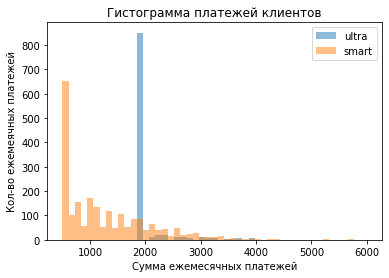

In [30]:
bins = np.linspace(500, 6000, 50)
fig, ax1 = plt.subplots()
plt.hist(ultra_data['expenses'], bins, alpha=0.5, label='ultra')
plt.hist(smart_data['expenses'], bins, alpha=0.5, label='smart')
plt.legend(loc='upper right')
ax1.set_title('Гистограмма платежей клиентов')
ax1.set_xlabel('Сумма ежемесячных платежей')
ax1.set_ylabel('Кол-во ежемеячных платежей')
plt.show()

По данной гистограмме видно, что клиенты тарифа smart гораздо реже "вылезают" за пределы своего тарифа, нежели пользоватили smart'а. Причем у последних наблюдаются ежемесячные платежи свыше 4000 рублей в месяц, хоть и редкие. Обе гистограммы скошены вправо.  
Рассчет среднего, медианы, дисперсии и стандартного отклонения:

In [31]:
data.groupby('tariff').agg({'expenses':['median','mean','var','std']}).style.format("{:.3f}")

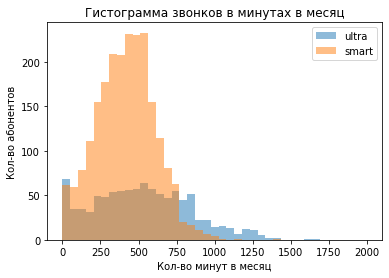

In [32]:
bins = np.linspace(0, 2000, 40)
fig, ax1 = plt.subplots()
plt.hist(ultra_data['minutes_in_month'], bins, alpha=0.5, label='ultra')
plt.hist(smart_data['minutes_in_month'], bins, alpha=0.5, label='smart')
plt.legend(loc='upper right')
ax1.set_title('Гистограмма звонков в минутах в месяц')
ax1.set_xlabel('Кол-во минут в месяц')
ax1.set_ylabel('Кол-во абонентов')
plt.show()

Гистограмма для пользователей тарифа `ultra`скошена вправо. Большая часть использует лишь 350-650 минут из 3000, предложенных тарифом.  
Гистограмма для пользователей тарифа `smart` нормальная. Большая часть использует лишь 350-550 минут из 500, предложенных тарифом. После 550 минут резко падает количество используемых минут.  
Рассчет среднего, медианы, дисперсии и стандартного отклонения:

In [33]:
print('Звонки в минутах в месяц')
data.groupby('tariff').agg({'minutes_in_month':['median','mean','var','std']}).style.format("{:.3f}")

Звонки в минутах в месяц


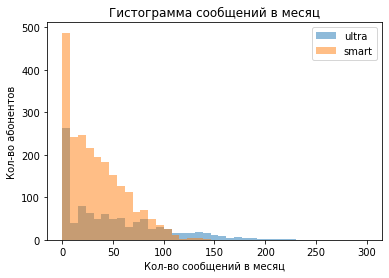

In [34]:
bins = np.linspace(0, 300, 40)
fig, ax1 = plt.subplots()
plt.hist(ultra_data['messages_in_month'], bins, alpha=0.5, label='ultra')
plt.hist(smart_data['messages_in_month'], bins, alpha=0.5, label='smart')
plt.legend(loc='upper right')
ax1.set_title('Гистограмма сообщений в месяц')
ax1.set_xlabel('Кол-во сообщений в месяц')
ax1.set_ylabel('Кол-во абонентов')
plt.show()

Обе гистограммы скошены вправо. Пользователи тарифа `ultra` не используют все сообщения, предоставленные тарифом, в отличии от пользователей `smart`'а, которые нередко выходят из своего лимита в 50 сообщений.  
Рассчет среднего, медианы, дисперсии и стандартного отклонения:

In [35]:
print('Сообщения в месяц')
data.groupby('tariff').agg({'messages_in_month':['median','mean','var','std']}).style.format("{:.3f}")

Сообщения в месяц


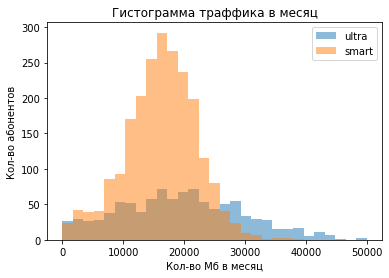

In [36]:
bins = np.linspace(0, 50000, 30)
fig, ax1 = plt.subplots()
plt.hist(ultra_data['mb_in_month'], bins, alpha=0.5, label='ultra')
plt.hist(smart_data['mb_in_month'], bins, alpha=0.5, label='smart')
plt.legend(loc='upper right')
ax1.set_title('Гистограмма траффика в месяц')
ax1.set_xlabel('Кол-во Мб в месяц')
ax1.set_ylabel('Кол-во абонентов')
plt.show()

Обе гистограммы нормальные. В обоих тарифах абоненты выходят за лимиты своего тарифа, однако для абонентов тарифа `smart` это скорее норма, потому что большинство использует 14-20 Гб траффика, что в большей части выходит за лимит 15360 Мб.  
Пользователи тарифа `ultra` больше используют интернет, много абонентов используют как 15, так 20 и 30Гб траффика.  
Рассчет среднего, медианы, дисперсии и стандартного отклонения:

In [37]:
print('Траффик в месяц')
data.groupby('tariff').agg({'mb_in_month':['median','mean','var','std']}).style.format("{:.3f}")

Траффик в месяц


**Вывод**  
В среднем пользователи тарифа smart используют меньше сообщений, минут и интернета в месяц, нежели пользователи тарифа ultra, что вполне себе логично. Однако количество используемых минут и сообщений у обоих тарифов не сильно различаются, то пользователи тарифа ultra значительно больше используют интернет.  
Видимо, пользователи этого тарифа выбирают его в большей степени ради интернета.  
Пользователи тарифа smart часто выходят за лимиты своего тарифа в количестве используемых минут и Мб интернета, явно им его недостаточно.

Проверка гипотез
======
**Гипотеза 1**
- Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

Нужно сформулировать нулевую и альтернативную гипотезы. Нулевая гипотеза должна быть со знаком равно.  
H₀ = средняя выручка пользователей тарифов «Ультра» и «Смарт» равна  
H₁ - средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна

критический уровень статистической значимости:

In [38]:
alpha = .05

In [39]:
test1 = st.ttest_ind(ultra_data['expenses'], smart_data['expenses'])

print('p-значение:', test1.pvalue)

if (test1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print('Средняя выручка в месяц от пользователя тарифа ultra:', ultra_data['expenses'].mean())
print('Средняя выручка в месяц от пользователя тарифа smart:', smart_data['expenses'].mean())

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу
Средняя выручка в месяц от пользователя тарифа ultra: 2070.1522842639592
Средняя выручка в месяц от пользователя тарифа smart: 1289.9735307312696


Разница между средней выручкой с пользователей разных тарифов довольно большая, тариф ultra для телеком-компании выгоднее.  
Гипотеза 1 подтвердилась, выручки различаются.

**Гипотеза 2**  
- Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нужно сформулировать нулевую и альтернативную гипотезы.  
H₀ = средняя выручка пользователей из Москвы и остальных регионов равна  
H₁ - средняя выручка пользователей из Москвы и остальных регионов не равна

Надо разделить пользователей, из Москвы и не из Москвы.

In [40]:
users_moscow = data.query('city == "Москва"')
users_region = data.query('city != "Москва"')

In [41]:
test2 = st.ttest_ind(users_moscow['expenses'], users_region['expenses'])

print('p-значение:', test2.pvalue)

if (test2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print('Средняя выручка в месяц от пользователя из Москвы:', users_moscow['expenses'].mean())
print('Средняя выручка в месяц от пользователя из региона:', users_region['expenses'].mean())

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу
Средняя выручка в месяц от пользователя из Москвы: 1546.7135842880523
Средняя выручка в месяц от пользователя из региона: 1524.9362274298885


Рассчеты дают основание предполагать, что вторая гипотеза не подтвердилась, из Москвы и из региона пользователи тратят на связь практически одну и ту же сумму.

**Вывод**
- Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов: отвегнута
- Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются: отвергнули.

# Общий вывод

В данной проектной работе:  
- Исправлен формат столбцов с датами
- Проверены таблицы на выбросы
- Сгруппированы таблицы и добавлены столбцы
- Все таблицы объединены в одну для дальнейшего анализа и проверки гипотез
- Рассчитана помесячная выручка с каждого абонента
- Проведен анализ данных: сколько минут, сообщений и траффика интернета используют абоненты разных тарифов, насколько часто выходят за лимиты тарифов
- Проверены две гипотезы, первая подтвердилась, вторая была отвергнута

Тариф ultra приносит компании бо́льшую выручку. Оператору сфокусироваться на его продвижении.  
Также стоит сократить количество доступных бесплатных смс, они явно излишни и не используются в тарифе ultra даже на 20%.